In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the RHS of the ODE
def rhs(t, u):
    return (1 - (4/3) * t) * u

In [3]:
# Exact solution
def exact(t):
    return 6 - 2 * np.exp(-t) - 3 * np.exp(-t / 2)

In [4]:
# Function to apply Trapezoidal Euler method
def trapezoidal_method(t0, u0, h, T):
    t = np.arange(t0, T + h, h)
    n = len(t)
    u = np.zeros(n)
    u_exp = np.zeros(n)
    u[0] = u0

    for i in range(n - 1):
        u_exp[i + 1] = u[i] + rhs(t[i], u[i]) * h
        u[i + 1] = u[i] + h / 2 * (rhs(t[i], u[i]) + rhs(t[i + 1], u_exp[i + 1]))

    return t, u

In [21]:
# Run for h = 0.01
t1, u1 = trapezoidal_method(t0=0, u0=2, h=0.01, T=20)
exact1 = exact(t1)

In [22]:
# Run for h = 0.001
t2, u2 = trapezoidal_method(t0=0, u0=2, h=0.001, T=20)
exact2 = exact(t2)

In [23]:
# Error calculations
error1 = np.abs(exact1 - u1)
error2 = np.abs(exact2 - u2)

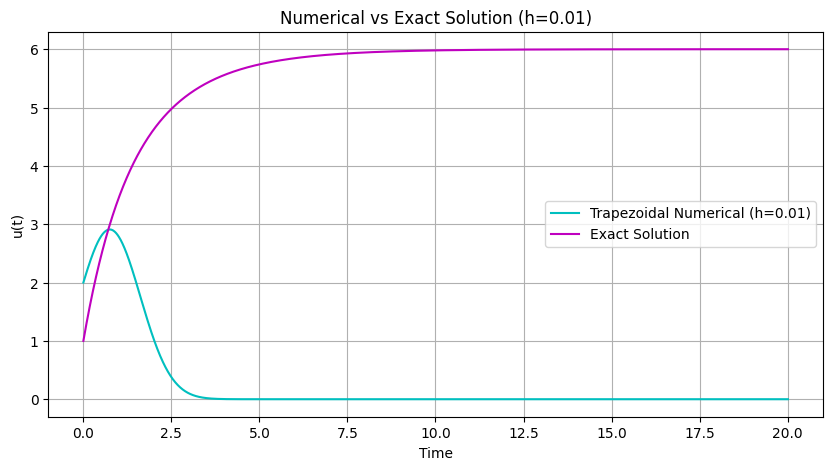

In [24]:
# Plot 1: Solution comparison for h=0.01
plt.figure(figsize=(10, 5))
plt.plot(t1, u1, 'c', label='Trapezoidal Numerical (h=0.01)')
plt.plot(t1, exact1, 'm', label='Exact Solution')
plt.title("Numerical vs Exact Solution (h=0.01)")
plt.xlabel("Time")
plt.ylabel("u(t)")
plt.legend()
plt.grid(True)
plt.show()

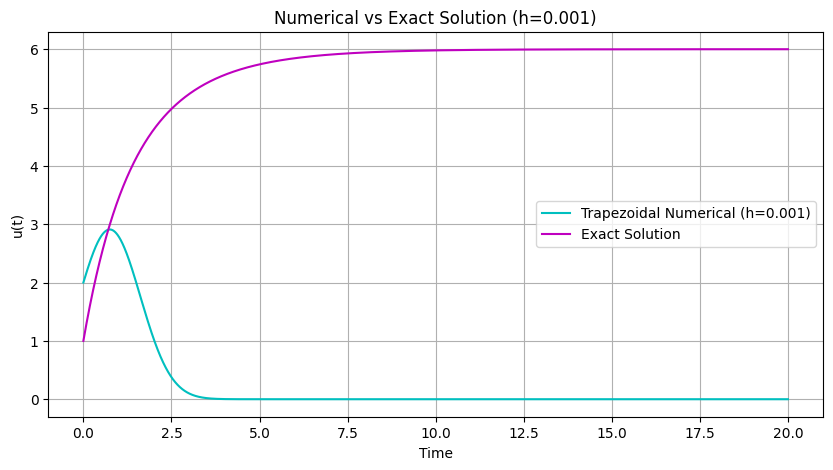

In [25]:
# Plot 2: Solution comparison for h=0.001
plt.figure(figsize=(10, 5))
plt.plot(t2, u2, 'c', label='Trapezoidal Numerical (h=0.001)')
plt.plot(t2, exact2, 'm', label='Exact Solution')
plt.title("Numerical vs Exact Solution (h=0.001)")
plt.xlabel("Time")
plt.ylabel("u(t)")
plt.legend()
plt.grid(True)
plt.show()

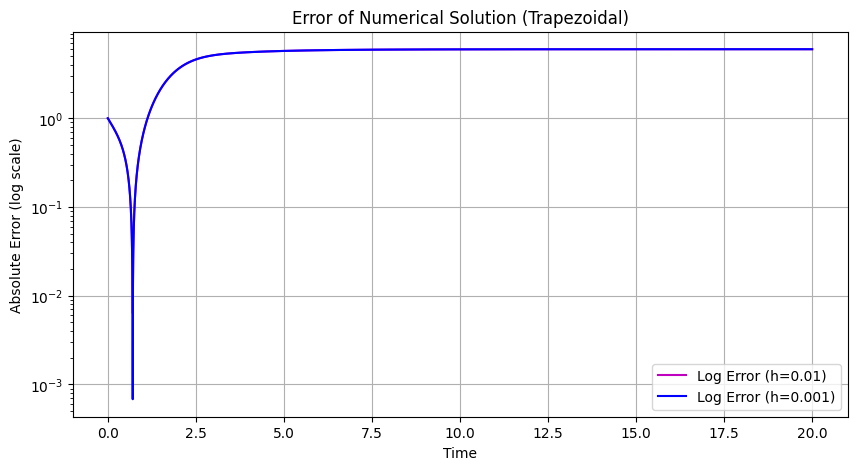

In [26]:
# Plot 3: Log error comparison
plt.figure(figsize=(10, 5))
plt.semilogy(t1, error1, 'm', label='Log Error (h=0.01)')
plt.semilogy(t2, error2, 'b', label='Log Error (h=0.001)')
plt.title("Error of Numerical Solution (Trapezoidal)")
plt.xlabel("Time")
plt.ylabel("Absolute Error (log scale)")
plt.legend()
plt.grid(True)
plt.show()